In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxr
import glob
import datetime
from pyproj import Proj, Transformer
import os
from scipy import interpolate

In [32]:
times_GOES = pd.read_csv('/Users/jonstar/Documents/heat_data/GOES_East_times.csv').datetime

In [33]:
times_GOES

0         202201010000
1         202201010010
2         202201010020
3         202201010030
4         202201010040
              ...     
104725    202312312310
104726    202312312320
104727    202312312330
104728    202312312340
104729    202312312350
Name: datetime, Length: 104730, dtype: int64

In [4]:
times_Landsat = pd.read_csv('/Users/jonstar/Documents/heat_data/Landsat_times/Landsat_times_DMV.csv')

In [5]:
times_Landsat

,system:index,value,.geo
0,0,1.641657e+12,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,1,1.643039e+12,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,2,1.644422e+12,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,3,1.645804e+12,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,4,1.647186e+12,"{""type"":""MultiPoint"",""coordinates"":[]}"
5,5,1.648569e+12,"{""type"":""MultiPoint"",""coordinates"":[]}"
6,6,1.649951e+12,"{""type"":""MultiPoint"",""coordinates"":[]}"
7,7,1.651334e+12,"{""type"":""MultiPoint"",""coordinates"":[]}"
8,8,1.652716e+12,"{""type"":""MultiPoint"",""coordinates"":[]}"
9,9,1.654098e+12,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [6]:
GOES_tif_list = glob.glob('../../heat_data/GOES_DMV/*.tif')
GOES_tif_list

['../../heat_data/GOES_DMV/GOES_image_202201011130.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201010010.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201011440.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201011520.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201010400.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201011050.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201011910.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201010830.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201012000.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201010950.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201012200.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201011720.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201011250.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201010600.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201011330.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201011640.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201010210.tif',
 '../../heat_data/GOES_DMV/GOES

In [7]:
def sort_func(s):
    return int(s.split('image_')[1].split('.tif')[0])

In [8]:
GOES_tif_list = sorted(GOES_tif_list, key=sort_func)
GOES_tif_list

['../../heat_data/GOES_DMV/GOES_image_202201010000.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201010010.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201010020.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201010030.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201010040.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201010050.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201010100.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201010110.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201010120.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201010130.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201010140.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201010150.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201010200.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201010210.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201010220.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201010230.tif',
 '../../heat_data/GOES_DMV/GOES_image_202201010240.tif',
 '../../heat_data/GOES_DMV/GOES

In [9]:
Landsat_tif_list = glob.glob('../../heat_data/Landsat_Sentinel_DMV_reflect/*.tif')
Landsat_tif_list

['../../heat_data/Landsat_Sentinel_DMV_reflect/Landsat_Sentinel_image_202202251546.tif',
 '../../heat_data/Landsat_Sentinel_DMV_reflect/Landsat_Sentinel_image_202203131546.tif',
 '../../heat_data/Landsat_Sentinel_DMV_reflect/Landsat_Sentinel_image_202202091546.tif',
 '../../heat_data/Landsat_Sentinel_DMV_reflect/Landsat_Sentinel_image_202203291546.tif',
 '../../heat_data/Landsat_Sentinel_DMV_reflect/Landsat_Sentinel_image_202201081546.tif',
 '../../heat_data/Landsat_Sentinel_DMV_reflect/Landsat_Sentinel_image_202201241546.tif']

In [10]:
Landsat_tif_list = sorted(Landsat_tif_list, key=sort_func)
Landsat_tif_list

['../../heat_data/Landsat_Sentinel_DMV_reflect/Landsat_Sentinel_image_202201081546.tif',
 '../../heat_data/Landsat_Sentinel_DMV_reflect/Landsat_Sentinel_image_202201241546.tif',
 '../../heat_data/Landsat_Sentinel_DMV_reflect/Landsat_Sentinel_image_202202091546.tif',
 '../../heat_data/Landsat_Sentinel_DMV_reflect/Landsat_Sentinel_image_202202251546.tif',
 '../../heat_data/Landsat_Sentinel_DMV_reflect/Landsat_Sentinel_image_202203131546.tif',
 '../../heat_data/Landsat_Sentinel_DMV_reflect/Landsat_Sentinel_image_202203291546.tif']

In [11]:
def to_binary_string(num):
    if np.isnan(num):
        return np.NaN
    else:
        return f'{int(num):b}'

In [12]:
to_binary_string(55052)

'1101011100001100'

In [13]:
"""
Export coordinates for each urban area
KEY: [utm zone, T/F Northern Hemisphere]
"""
proj_zone = {
    'DMV':[18, True], 'NYC':[18, True], 'Phoenix':[12, True], 'Miami':[17, True], 'Chicago':[16, True], 'Denver':[13, True],
    'Seattle':[10, True], 'San_Francisco':[10, True], 'Los_Angeles':[11, True], 'Atlanta':[16, True], 'Toronto':[17, True],
    'Mexico_City':[14, True], 'Las_Vegas':[11, True], 'Salt_Lake_City':[12, True], 'Dallas':[14, True], 'Houston':[15, True],
    'New_Orleans':[15, True], 'St_Louis':[15, True], 'Minneapolis':[15, True], 'Jacksonville':[17, True], 'Charlotte':[17, True],
    'Philadelphia':[18, True], 'San_Diego':[11, True], 'San_Juan':[19, True], 'Montreal':[18, True], 'Guadalajara':[13, True],
    'Monterrey':[14, True], 'Cancun':[16, True], 'Billings':[12, True], 'Guatemala_City':[15, True], 'San_Jose':[16, True],
    'Havana':[17, True], 'Santo_Domingo':[19, True], 'Tegucigalpa':[16, True], 'Managua':[16, True], 'Panama_City':[17, True],
    'Bogota':[18, True], 'Lima':[18, False], 'Quito':[17, True], 'Santiago':[19, False], 'Buenos_Aires':[21, False],
    'Sao_Paulo':[23, False], 'Manaus':[20, False], 'Punta_Arenas':[19, False],
    'La_Paz':[19, False], 'Montevideo':[21, False], 'Brasilia':[22, False], 'Caracas':[19, True]
}

In [56]:
city = 'DMV'
city_zone = proj_zone[city]
city_zone

[18, True]

In [57]:
# Define UTM18N projection (WGS84 datum)
global utm_proj 
utm_proj = Proj(proj="utm", zone=city_zone[0], datum="WGS84", northern=city_zone[1])

# Sample Code

## Landsat

In [58]:
dsLS = rxr.open_rasterio('/Users/jonstar/Documents/heat_data/Landsat_Sentinel_DMV/Landsat_Sentinel_image_202201081546.tif')[:,:3000,:3000]
geotiff_dsLS = dsLS.to_dataset('band')

In [59]:
geotiff_dsLS[1]

<xarray.DataArray 1 (y: 3000, x: 3000)> Size: 72MB
[9000000 values with dtype=float64]
Coordinates:
  * x            (x) float64 24kB 2.92e+05 2.92e+05 ... 3.819e+05 3.82e+05
  * y            (y) float64 24kB 4.372e+06 4.372e+06 ... 4.282e+06 4.282e+06
    spatial_ref  int64 8B 0

In [60]:
geotiff_dsLS.y[0]

<xarray.DataArray 'y' ()> Size: 8B
array(4372215.)
Coordinates:
    y            float64 8B 4.372e+06
    spatial_ref  int64 8B 0

In [103]:
y, x = np.meshgrid(geotiff_dsLS['y'], geotiff_dsLS['x'])
utm_coords = np.stack((x,y)).T.reshape(-1,2)
utm_coords

array([[ 292005., 4372215.],
       [ 292035., 4372215.],
       [ 292065., 4372215.],
       ...,
       [ 381915., 4282245.],
       [ 381945., 4282245.],
       [ 381975., 4282245.]])

In [62]:
def stacked_to_latlon(pt):
    return utm_proj(pt[0], pt[1], inverse=True)

In [107]:
latlon_pts = np.array(list(map(stacked_to_latlon, utm_coords)))

In [108]:
latlon_pts = latlon_pts.reshape((3000,3000,2))
latlon_pts

array([[[-77.41811092,  39.47440334],
        [-77.41776243,  39.47441059],
        [-77.41741395,  39.47441784],
        ...,
        [-76.37322276,  39.49144403],
        [-76.37287398,  39.49144815],
        [-76.37252521,  39.49145227]],

       [[-77.41810156,  39.47413326],
        [-77.41775308,  39.47414051],
        [-77.4174046 ,  39.47414776],
        ...,
        [-76.37321745,  39.49117379],
        [-76.37286867,  39.49117791],
        [-76.37251989,  39.49118203]],

       [[-77.41809221,  39.47386319],
        [-77.41774373,  39.47387044],
        [-77.41739525,  39.47387769],
        ...,
        [-76.37321213,  39.49090355],
        [-76.37286335,  39.49090767],
        [-76.37251458,  39.49091179]],

       ...,

       [[-77.39062942,  38.66491692],
        [-77.39028489,  38.66492396],
        [-77.38994036,  38.66493101],
        ...,
        [-76.35760392,  38.68147557],
        [-76.35725911,  38.68147958],
        [-76.35691429,  38.68148358]],

       [[-77.39

In [65]:
xr.DataArray(latlon_pts, dims=['longitude','latitude','latlon_pts']).to_netcdf(f'/Users/jonstar/Documents/heat_data/latlons_processed/{city}_latlons.nc')

In [66]:
xr.open_dataarray(f'/Users/jonstar/Documents/heat_data/latlons_processed/{city}_latlons.nc').values

array([[[-97.50019051,  33.23800235],
        [-97.49986861,  33.23799846],
        [-97.49954671,  33.23799458],
        ...,
        [-96.53578868,  33.22263115],
        [-96.53546703,  33.22262477],
        [-96.53514537,  33.2226184 ]],

       [[-97.50019513,  33.23773184],
        [-97.49987323,  33.23772796],
        [-97.49955133,  33.23772407],
        ...,
        [-96.53579627,  33.2223608 ],
        [-96.53547461,  33.22235442],
        [-96.53515296,  33.22234805]],

       [[-97.50019975,  33.23746133],
        [-97.49987785,  33.23745745],
        [-97.49955595,  33.23745356],
        ...,
        [-96.53580385,  33.22209045],
        [-96.5354822 ,  33.22208407],
        [-96.53516054,  33.2220777 ]],

       ...,

       [[-97.51376182,  32.4272347 ],
        [-97.51344283,  32.42723093],
        [-97.51312384,  32.42722717],
        ...,
        [-96.55806949,  32.41233097],
        [-96.55775073,  32.41232479],
        [-96.55743198,  32.4123186 ]],

       [[-97.51

In [67]:
# For Landsat/Sentinel tifs
geotiff_dsLS = geotiff_dsLS.rename({1:'Blue_sfc_reflectance', 2:'Green_sfc_reflectance', 3:'Red_sfc_reflectance', 4:'NIR_sfc_reflectance',
                                    5:'SWIR1_sfc_reflectance', 6:'SWIR2_sfc_reflectance', 7:'Landsat_LST', 8:'Landsat_Cloud_Mask',
                                    9:'VV_SAR', 10:'VH_SAR', 11:'HH_SAR', 12:'HV_SAR', 13:'SAR_angle'})

In [69]:
geotiff_dsLS['VV_SAR'].values

array([[-17.10534705, -15.60215774, -17.03709781, ..., -12.57181104,
        -12.88394942, -14.50450667],
       [-14.20094796, -15.28419054, -12.85945885, ..., -17.13626834,
        -14.06102332, -15.0437094 ],
       [-13.68954097, -15.40913085, -12.48455053, ..., -14.96831556,
        -12.90637569, -13.33331944],
       ...,
       [-12.026556  , -18.64033756, -14.66905481, ..., -14.6743872 ,
        -15.61210665, -15.99535205],
       [-11.80579876, -17.28350031, -14.59944313, ..., -14.88143737,
        -15.07908718, -17.13485831],
       [-11.15753994, -17.61457726, -16.50003129, ..., -14.67789256,
        -17.46502211, -15.40913788]])

In [70]:
geotiff_dsLS['Landsat_Cloud_Mask'].values

array([[21824., 21824., 21824., ..., 21824., 21824., 21824.],
       [21824., 21824., 21824., ..., 21824., 21824., 21824.],
       [21824., 21824., 21824., ..., 21824., 21824., 21824.],
       ...,
       [21824., 21824., 21824., ..., 21824., 21824., 21824.],
       [21824., 21824., 21824., ..., 21824., 21824., 21824.],
       [21824., 21824., 21824., ..., 21824., 21824., 21824.]])

In [34]:
binary_vectorized = np.vectorize(to_binary_string)
mask = binary_vectorized(geotiff_dsLS.Landsat_Cloud_Mask.values)

In [35]:
mask

array([['111010100100010', '111010100100010', '111011000100010', ...,
        '101111000010010', '101011100001000', '101011100001000'],
       ['111010100100010', '111010100100010', '111010100100010', ...,
        '101110100010010', '101111000010010', '101111000010010'],
       ['111010101100000', '111010101100000', '111010100100010', ...,
        '101111000010010', '101011100001000', '101011100001000'],
       ...,
       ['101011100001000', '101111000010010', '101011100001000', ...,
        '101010111000000', '101010111000000', '101010111000000'],
       ['101110100010010', '101111000010010', '101111000010010', ...,
        '101010111000000', '101010111000000', '101010111000000'],
       ['101111000010010', '111011000100010', '111011000100010', ...,
        '101010111000000', '101010111000000', '101010111000000']],
      dtype='<U16')

In [39]:
geotiff_dsLS['Landsat_Cloud_Mask'] = (('y', 'x'), mask)

In [40]:
geotiff_dsLS['Landsat_Cloud_Mask'].attrs['bitmask_key'] = "Bit 0: Fill\nBit 1: Dilated Cloud\nBit 2: Cirrus (high confidence)\nBit 3: Cloud\nBit 4: Cloud Shadow\n\
Bit 5: Snow\nBit 6: Clear\n    0: Cloud or Dilated Cloud bits are set\n    1: Cloud and Dilated Cloud bits are not set\nBit 7: Water\n\
Bits 8-9: Cloud Confidence\n    0: None\n    1: Low\n    2: Medium\n    3: High\n\
Bits 10-11: Cloud Shadow Confidence\n    0: None\n    1: Low\n    2: Medium\n    3: High\n\
Bits 12-13: Snow/Ice Confidence\n    0: None\n    1: Low\n    2: Medium\n    3: High\n\
Bits 14-15: Cirrus Confidence\n    0: None\n    1: Low\n    2: Medium\n    3: High"

In [42]:
geotiff_dsLS

<xarray.Dataset> Size: 2GB
Dimensions:                (y: 3071, x: 3940)
Coordinates:
  * x                      (x) float64 32kB -77.42 -77.42 ... -76.36 -76.36
  * y                      (y) float64 25kB 39.49 39.49 39.49 ... 38.66 38.66
    spatial_ref            int64 8B 0
Data variables:
    Blue_sfc_reflectance   (y, x) float64 97MB 0.8765 0.6358 ... 0.01359 0.01307
    Green_sfc_reflectance  (y, x) float64 97MB ...
    Red_sfc_reflectance    (y, x) float64 97MB ...
    NIR_sfc_reflectance    (y, x) float64 97MB ...
    SWIR1_sfc_reflectance  (y, x) float64 97MB ...
    SWIR2_sfc_reflectance  (y, x) float64 97MB ...
    Landsat_LST            (y, x) float64 97MB ...
    Landsat_Cloud_Mask     (y, x) <U16 774MB '111010100100010' ... '101010111...
    VV_SAR                 (y, x) float64 97MB -9.921 -10.85 ... -21.56 -19.22
    VH_SAR                 (y, x) float64 97MB ...
    SAR_angle              (y, x) float64 97MB ...
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ('SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7', 'S...

In [47]:
geotiff_dsLS = geotiff_dsLS.assign_coords({'datetime':str(times_Landsat[0])})

In [48]:
geotiff_dsLS

<xarray.Dataset> Size: 2GB
Dimensions:                (y: 3071, x: 3940)
Coordinates:
  * x                      (x) float64 32kB -77.42 -77.42 ... -76.36 -76.36
  * y                      (y) float64 25kB 39.49 39.49 39.49 ... 38.66 38.66
    spatial_ref            int64 8B 0
    datetime               <U26 104B '2022-01-08 10:46:41.472000'
Data variables:
    Blue_sfc_reflectance   (y, x) float64 97MB 0.8765 0.6358 ... 0.01359 0.01307
    Green_sfc_reflectance  (y, x) float64 97MB ...
    Red_sfc_reflectance    (y, x) float64 97MB ...
    NIR_sfc_reflectance    (y, x) float64 97MB ...
    SWIR1_sfc_reflectance  (y, x) float64 97MB ...
    SWIR2_sfc_reflectance  (y, x) float64 97MB ...
    Landsat_LST            (y, x) float64 97MB ...
    Landsat_Cloud_Mask     (y, x) <U16 774MB '111010100100010' ... '101010111...
    VV_SAR                 (y, x) float64 97MB -9.921 -10.85 ... -21.56 -19.22
    VH_SAR                 (y, x) float64 97MB ...
    SAR_angle              (y, x) float64 97MB ...
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ('SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7', 'S...

In [49]:
geotiff_dsLS.to_netcdf('../../heat_data/Landsat_Sentinel_DMV_processed/processed_Landsat_0.nc')

## GOES

In [114]:
dsG = rxr.open_rasterio('/Users/jonstar/Documents/heat_data/GOES_DMV/GOES_image_202201010000.tif')
#dsG = dsG.reindex(y=dsG.y[::-1])
geotiff_dsG = dsG.to_dataset('band')

In [115]:
geotiff_dsG

<xarray.Dataset> Size: 66kB
Dimensions:      (y: 45, x: 45)
Coordinates:
  * x            (x) float64 360B 2.93e+05 2.95e+05 ... 3.79e+05 3.81e+05
  * y            (y) float64 360B 4.371e+06 4.369e+06 ... 4.285e+06 4.283e+06
    spatial_ref  int64 8B 0
Data variables:
    1            (y, x) float64 16kB ...
    2            (y, x) float64 16kB ...
    3            (y, x) float64 16kB ...
    4            (y, x) float64 16kB ...
Attributes:
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    AREA_OR_POINT:           Area
    _FillValue:              0.0
    scale_factor:            1.0
    add_offset:              0.0

In [116]:
# For GOES tifs
geotiff_dsG = geotiff_dsG.rename({1:'GOES_C13_LWIR', 2:'GOES_C14_LWIR',
                                3:'GOES_C15_LWIR', 4:'GOES_C16_LWIR'})

In [117]:
geotiff_dsG['GOES_C16_LWIR'].values

array([[277.22007993, 276.74828503, 275.88332773, ..., 274.90042171,
        275.88332773, 276.86623376],
       [278.75341333, 277.69187482, 276.35512263, ..., 274.90042171,
        275.88332773, 276.86623376],
       [279.77563559, 278.6354646 , 278.16366971, ..., 275.41153284,
        277.69187482, 277.22007993],
       ...,
       [284.65084948, 284.13973834, 283.78589217, ..., 281.7021314 ,
        281.7021314 , 280.79785786],
       [284.65084948, 284.13973834, 283.78589217, ..., 282.80298615,
        281.82008012, 281.15170403],
       [283.78589217, 283.58931097, 283.58931097, ..., 282.80298615,
        281.82008012, 281.15170403]])

In [118]:
y, x = np.meshgrid(geotiff_dsG['y'], geotiff_dsG['x'])
utm_coords = np.stack((x,y)).T.reshape(-1,2)
utm_coords

array([[ 293000., 4371000.],
       [ 295000., 4371000.],
       [ 297000., 4371000.],
       ...,
       [ 377000., 4283000.],
       [ 379000., 4283000.],
       [ 381000., 4283000.]])

In [119]:
latlon_pts_2km_1d = np.array(list(map(stacked_to_latlon, utm_coords)))

In [120]:
latlon_pts_2km = latlon_pts_2km_1d.reshape((45,45,2))
latlon_pts_2km

array([[[-77.40617583,  39.46370501],
        [-77.3829467 ,  39.46418358],
        [-77.35971702,  39.46465751],
        ...,
        [-76.4301392 ,  39.47981056],
        [-76.40689153,  39.48009421],
        [-76.38364354,  39.48037321]],

       [[-77.40555572,  39.44569963],
        [-77.38233256,  39.44617789],
        [-77.35910885,  39.44665152],
        ...,
        [-76.42977035,  39.46179493],
        [-76.40652867,  39.4620784 ],
        [-76.38328667,  39.46235722]],

       [[-77.40493616,  39.42769418],
        [-77.38171897,  39.42817214],
        [-77.35850123,  39.42864547],
        ...,
        [-76.42940183,  39.44377925],
        [-76.40616614,  39.44406253],
        [-76.38293012,  39.44434118]],

       ...,

       [[-77.38060352,  38.70742405],
        [-77.3576207 ,  38.70788996],
        [-77.33463735,  38.70835136],
        ...,
        [-76.41492861,  38.72310362],
        [-76.391928  ,  38.72337977],
        [-76.36892708,  38.72365139]],

       [[-77.38

In [121]:
geotiff_dsG = geotiff_dsG.assign_coords({'datetime':str(times_GOES[0])})

In [122]:
geotiff_dsG

<xarray.Dataset> Size: 66kB
Dimensions:        (y: 45, x: 45)
Coordinates:
  * x              (x) float64 360B 2.93e+05 2.95e+05 ... 3.79e+05 3.81e+05
  * y              (y) float64 360B 4.371e+06 4.369e+06 ... 4.285e+06 4.283e+06
    spatial_ref    int64 8B 0
    datetime       <U12 48B '202201010000'
Data variables:
    GOES_C13_LWIR  (y, x) float64 16kB ...
    GOES_C14_LWIR  (y, x) float64 16kB ...
    GOES_C15_LWIR  (y, x) float64 16kB ...
    GOES_C16_LWIR  (y, x) float64 16kB 277.2 276.7 275.9 ... 282.8 281.8 281.2
Attributes:
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    AREA_OR_POINT:           Area
    _FillValue:              0.0
    scale_factor:            1.0
    add_offset:              0.0

### Working microwave into GOES

In [123]:
dsMW = xr.open_dataset('/Users/jonstar/Documents/heat_data/mw_data/MW_LST_DTC_20230531_x1y.h5')

In [124]:
dsMW

<xarray.Dataset> Size: 166MB
Dimensions:        (phony_dim_0: 96, phony_dim_1: 1440, phony_dim_2: 600)
Dimensions without coordinates: phony_dim_0, phony_dim_1, phony_dim_2
Data variables:
    TB37V_LST_DTC  (phony_dim_0, phony_dim_1, phony_dim_2) uint16 166MB ...

In [125]:
dsMW = dsMW.assign_coords(
    datetime=(
        "phony_dim_0", pd.date_range(start="20230531", periods=96, freq="15min")
    ),
    longitude=(
        "phony_dim_1", np.arange(-180,180,0.25)
    ),
    latitude=(
        "phony_dim_2", np.arange(-60,90,0.25)[::-1]
    ))

In [80]:
#dsMW = dsMW.rename({'phony_dim_0':'datetime', 'phony_dim_1':'longitude', 'phony_dim_2':'latitude'})#.set_index(('datetime', 'longitude', 'latitude'))

In [126]:
dsMW['datetime'][75]

<xarray.DataArray 'datetime' ()> Size: 8B
array('2023-05-31T18:45:00.000000000', dtype='datetime64[ns]')
Coordinates:
    datetime  datetime64[ns] 8B 2023-05-31T18:45:00

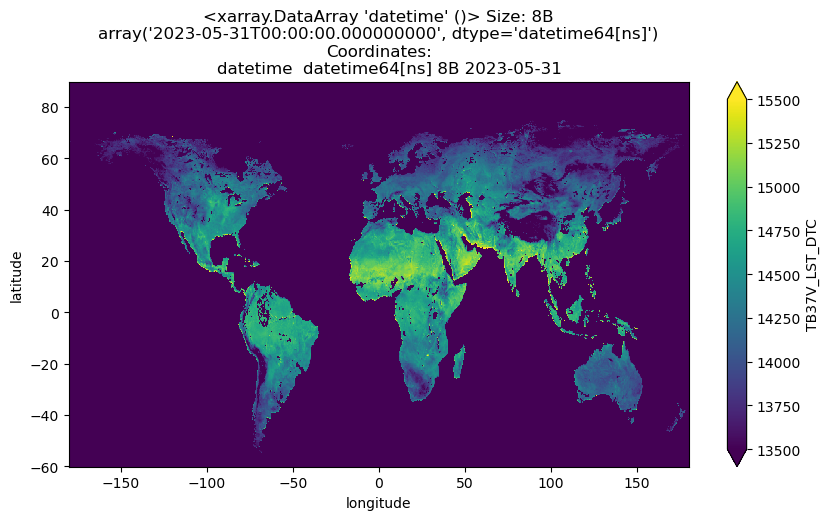

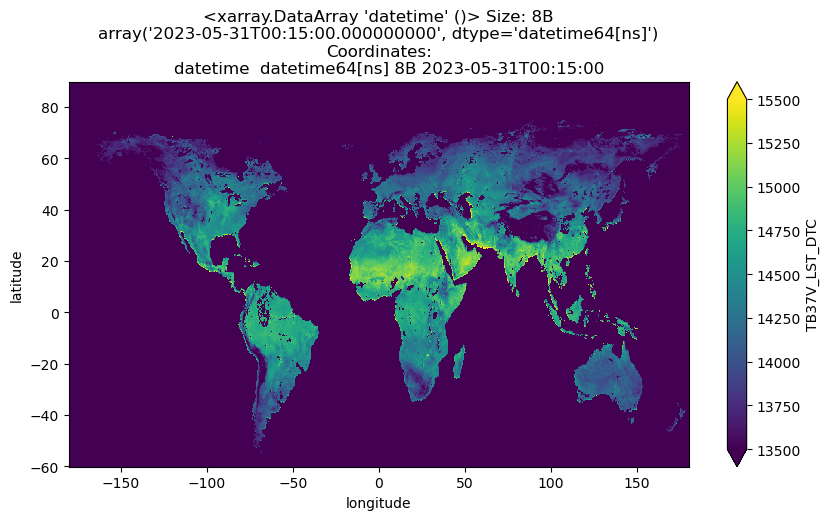

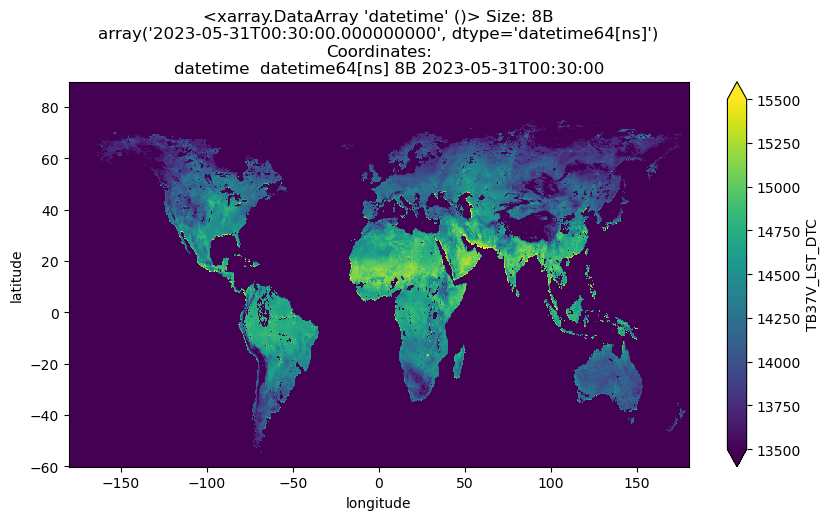

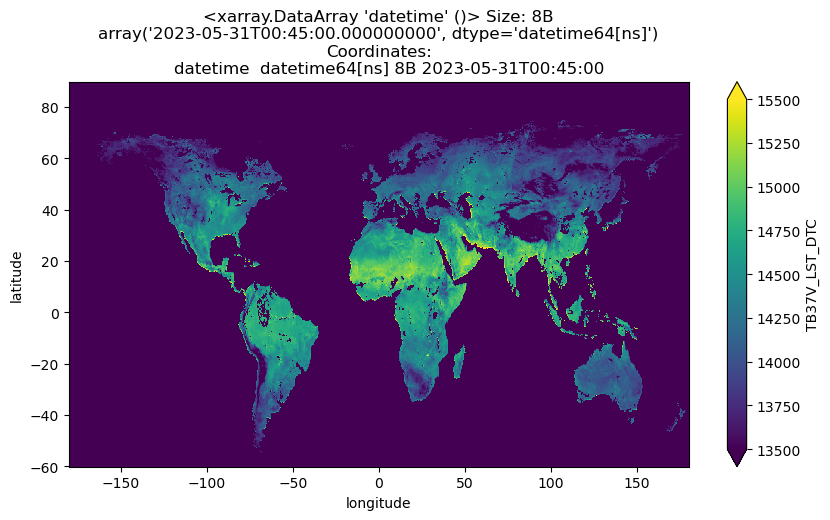

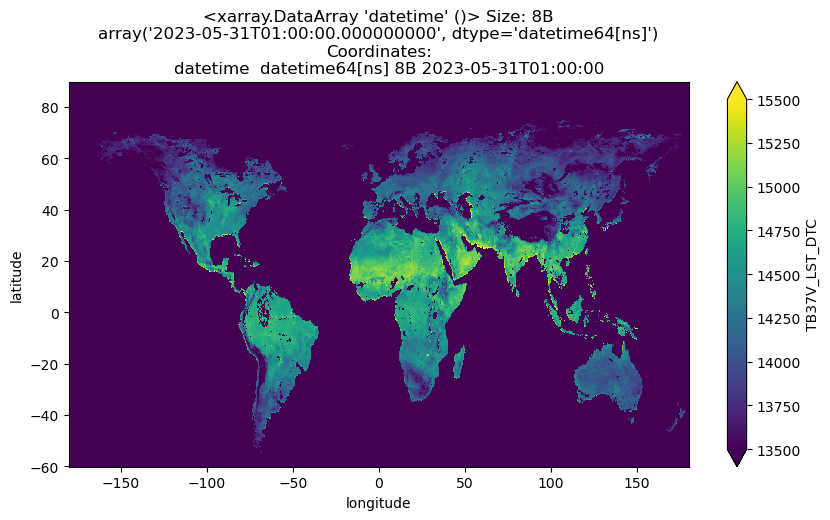

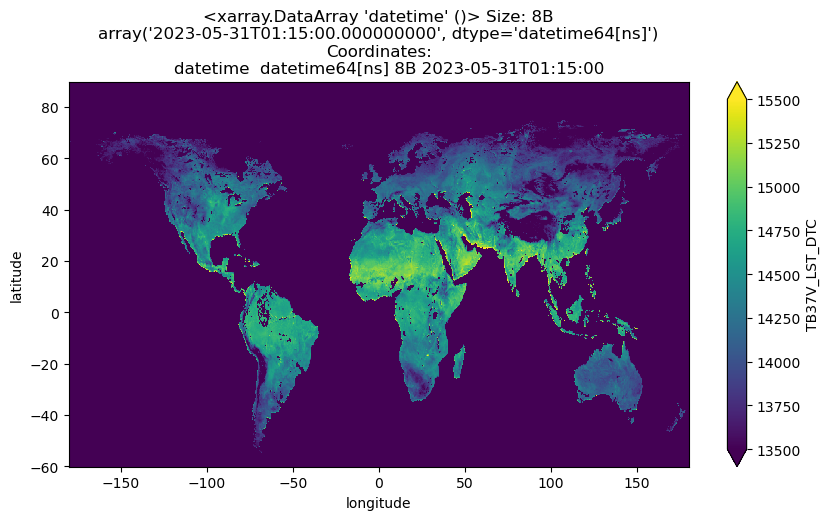

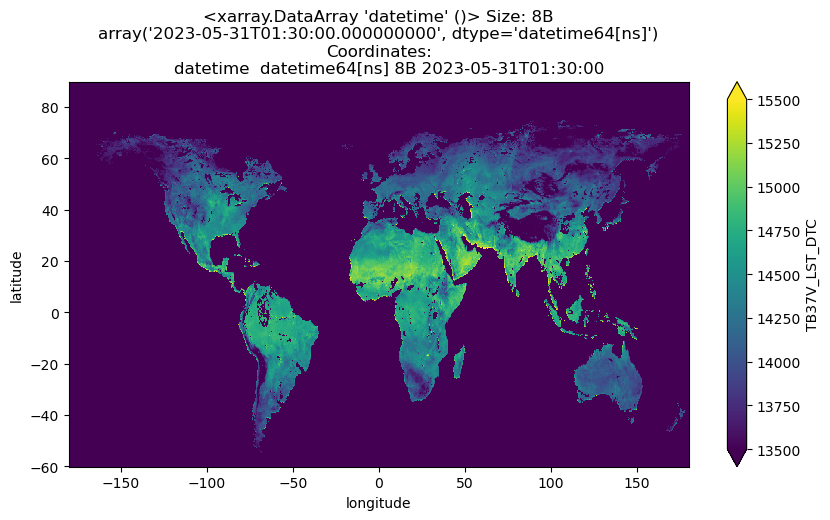

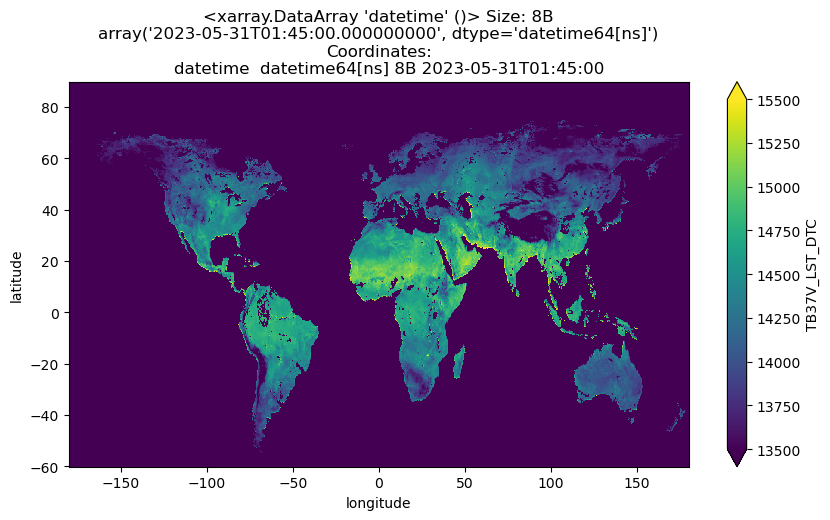

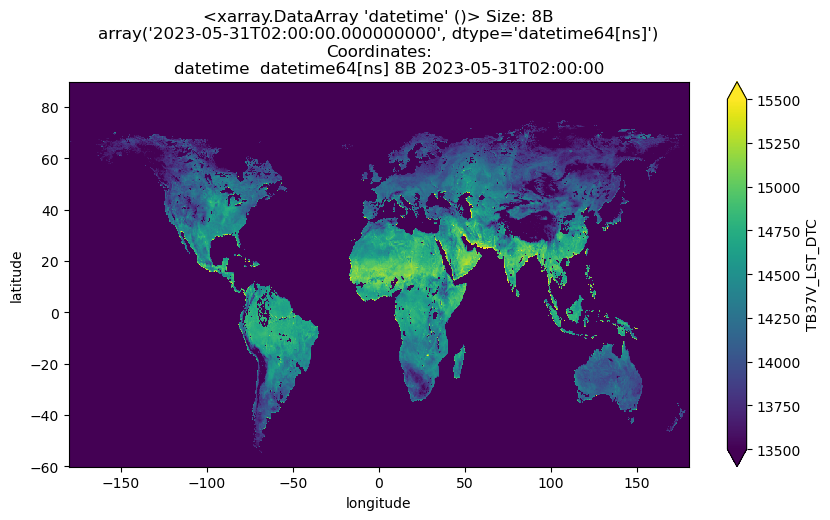

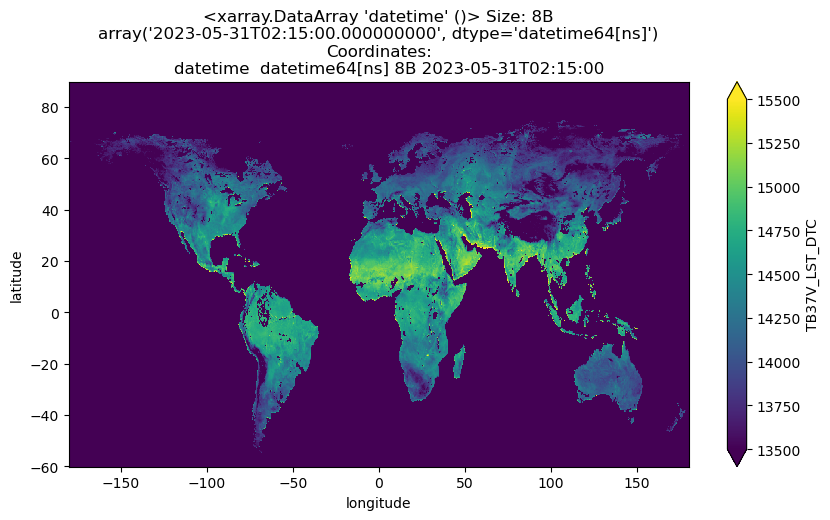

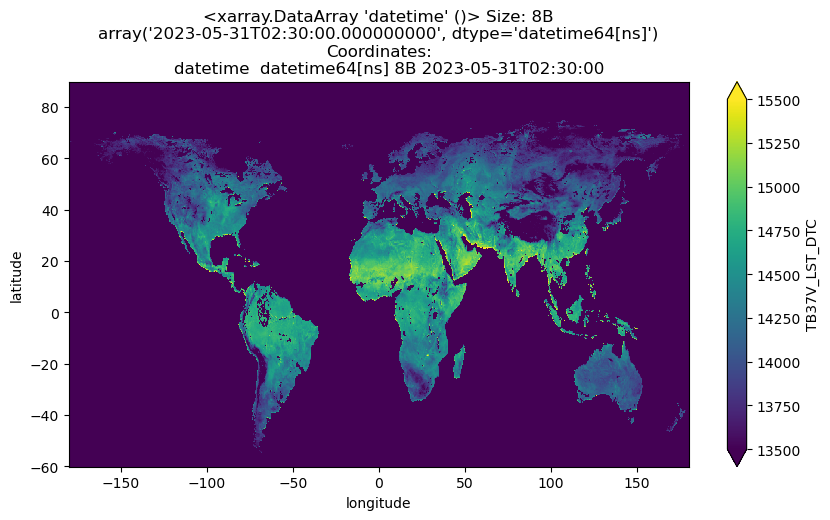

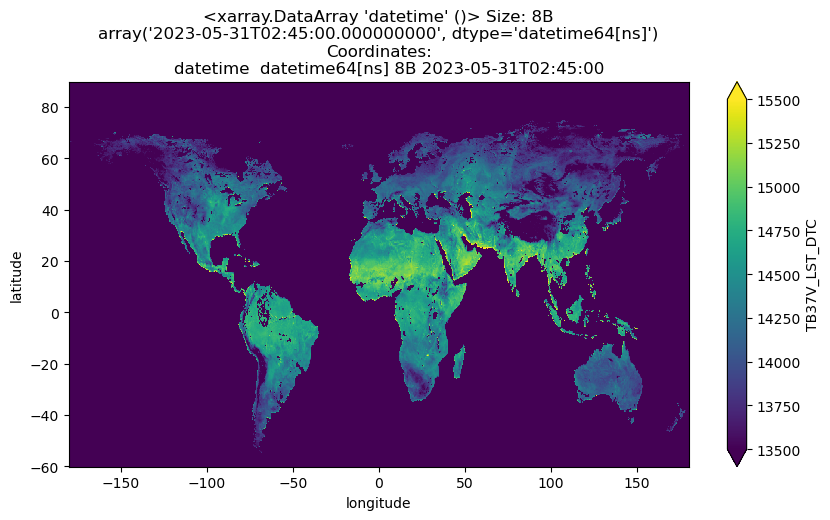

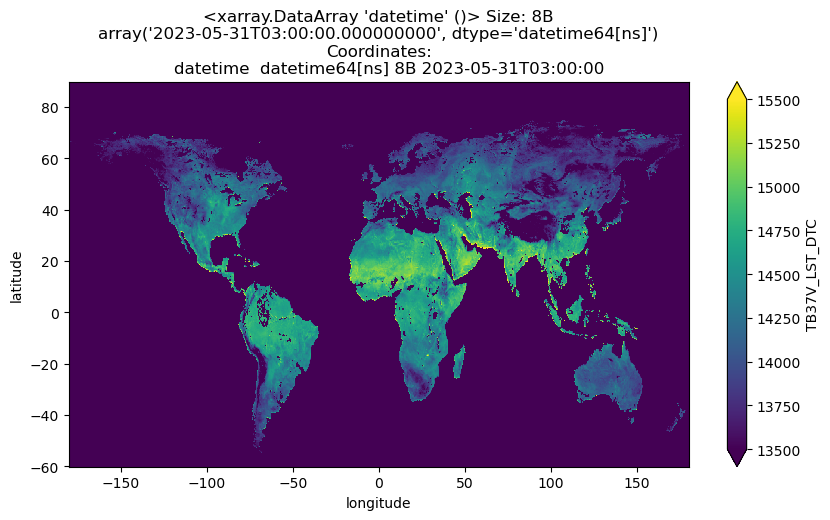


KeyboardInterrupt



KeyboardInterrupt: 

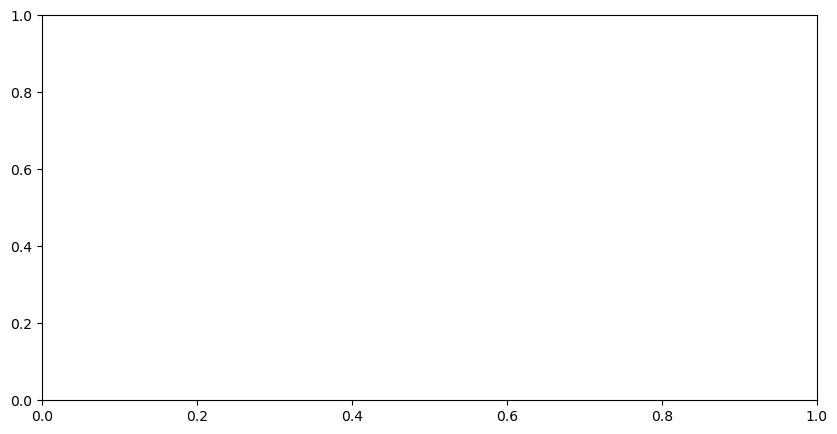

In [82]:
import matplotlib.pyplot as plt
for i in list(range(20)):
    #cb = plt.pcolormesh(dsMW['TB37V_LST_DTC'][i], vmin=13000, vmax=15000)
    dsMW['TB37V_LST_DTC'].isel(phony_dim_0=i).plot.pcolormesh("longitude", "latitude", vmin=13500, vmax=15500, figsize=(10,5))
    #plt.colorbar(cb)
    plt.title(dsMW['datetime'][i])
    #if i%24 == 0:
        #plt.savefig(f'../../photos/mw_{i}.jpg')
    plt.show()

In [127]:
np.max(latlon_pts_2km[:,:,0]), np.min(latlon_pts_2km[:,:,0]), np.max(latlon_pts_2km[:,:,1]), np.min(latlon_pts_2km[:,:,1])

(np.float64(-76.36824000890702),
 np.float64(-77.40617583434403),
 np.float64(39.48037320741648),
 np.float64(38.67140787501026))

In [84]:
def get_next_latlon_coord(n, above=True):
    if above:
        return np.ceil(n*4)/4
    else:
        return np.floor(n*4)/4

In [128]:
np.where(dsMW['latitude'] == 38.75)[0][0]

np.int64(204)

In [129]:
max_lon_index = np.where(dsMW['longitude'] == get_next_latlon_coord(np.max(latlon_pts_2km[:,:,0]), True))[0][0]
min_lon_index = np.where(dsMW['longitude'] == get_next_latlon_coord(np.min(latlon_pts_2km[:,:,0]), False))[0][0]
max_lat_index = np.where(dsMW['latitude'] == get_next_latlon_coord(np.max(latlon_pts_2km[:,:,1]), True))[0][0]
min_lat_index = np.where(dsMW['latitude'] == get_next_latlon_coord(np.min(latlon_pts_2km[:,:,1]), False))[0][0]

# Create microwave array for specific area
# Remember: latitude decreases with index
mw_clipped = dsMW['TB37V_LST_DTC'][0,min_lon_index:max_lon_index+1,max_lat_index:min_lat_index+1]

In [130]:
mw_clipped

<xarray.DataArray 'TB37V_LST_DTC' (phony_dim_1: 6, phony_dim_2: 5)> Size: 60B
[30 values with dtype=uint16]
Coordinates:
    datetime   datetime64[ns] 8B 2023-05-31
    longitude  (phony_dim_1) float64 48B -77.5 -77.25 -77.0 -76.75 -76.5 -76.25
    latitude   (phony_dim_2) float64 40B 39.5 39.25 39.0 38.75 38.5
Dimensions without coordinates: phony_dim_1, phony_dim_2
Attributes:
    Offset:   0.0
    Gain:     50.0
    NoData:   0.0

In [131]:
y, x = np.meshgrid(mw_clipped['latitude'], mw_clipped['longitude'])
mw_latlons = np.stack((x,y)).T.reshape(-1,2)
mw_latlons

array([[-77.5 ,  39.5 ],
       [-77.25,  39.5 ],
       [-77.  ,  39.5 ],
       [-76.75,  39.5 ],
       [-76.5 ,  39.5 ],
       [-76.25,  39.5 ],
       [-77.5 ,  39.25],
       [-77.25,  39.25],
       [-77.  ,  39.25],
       [-76.75,  39.25],
       [-76.5 ,  39.25],
       [-76.25,  39.25],
       [-77.5 ,  39.  ],
       [-77.25,  39.  ],
       [-77.  ,  39.  ],
       [-76.75,  39.  ],
       [-76.5 ,  39.  ],
       [-76.25,  39.  ],
       [-77.5 ,  38.75],
       [-77.25,  38.75],
       [-77.  ,  38.75],
       [-76.75,  38.75],
       [-76.5 ,  38.75],
       [-76.25,  38.75],
       [-77.5 ,  38.5 ],
       [-77.25,  38.5 ],
       [-77.  ,  38.5 ],
       [-76.75,  38.5 ],
       [-76.5 ,  38.5 ],
       [-76.25,  38.5 ]])

In [132]:
latlon_pts_2km

array([[[-77.40617583,  39.46370501],
        [-77.3829467 ,  39.46418358],
        [-77.35971702,  39.46465751],
        ...,
        [-76.4301392 ,  39.47981056],
        [-76.40689153,  39.48009421],
        [-76.38364354,  39.48037321]],

       [[-77.40555572,  39.44569963],
        [-77.38233256,  39.44617789],
        [-77.35910885,  39.44665152],
        ...,
        [-76.42977035,  39.46179493],
        [-76.40652867,  39.4620784 ],
        [-76.38328667,  39.46235722]],

       [[-77.40493616,  39.42769418],
        [-77.38171897,  39.42817214],
        [-77.35850123,  39.42864547],
        ...,
        [-76.42940183,  39.44377925],
        [-76.40616614,  39.44406253],
        [-76.38293012,  39.44434118]],

       ...,

       [[-77.38060352,  38.70742405],
        [-77.3576207 ,  38.70788996],
        [-77.33463735,  38.70835136],
        ...,
        [-76.41492861,  38.72310362],
        [-76.391928  ,  38.72337977],
        [-76.36892708,  38.72365139]],

       [[-77.38

In [133]:
mw_vals = mw_clipped.T.values.reshape(-1)
mw_vals

array([14177, 14120, 14097, 14108, 14148, 14186, 14191, 14128, 14088,
       14110, 14134, 14205, 14150, 14101, 13980, 13843, 14164, 14089,
       14183, 14196, 13967,     0, 14283, 14068, 14165, 14185,     0,
           0,     0, 14229], dtype=uint16)

In [134]:
mw_interpolated = interpolate.griddata(mw_latlons, mw_vals, latlon_pts_2km)
mw_interpolated

array([[14156.76952992, 14151.45797358, 14146.14643989, ...,
        14160.15323904, 14163.66532735, 14167.17781829],
       [14157.20431608, 14151.89413126, 14146.58396911, ...,
        14161.57849235, 14165.08968374, 14168.60127748],
       [14157.63923106, 14152.33041653, 14147.0216247 , ...,
        14163.00369983, 14166.51399511, 14170.02469247],
       ...,
       [14186.14314856, 14187.3718009 , 14188.60015583, ...,
        12673.19481233, 12669.19088021, 12664.92825869],
       [14184.87762423, 14186.10595597, 14187.33399048, ...,
        11643.47972148, 11639.47065325, 11635.20306123],
       [14183.61206759, 14184.840079  , 14186.06779337, ...,
        10613.76156573, 10609.74736196, 10605.47479991]])

In [135]:
geotiff_dsG['microwave_LST'] = (('y','x'), mw_interpolated)

In [136]:
geotiff_dsG = geotiff_dsG.assign_attrs(long_name='(\'CMI_C13\', \'CMI_C14\', \'CMI_C15\', \'CMI_C16\', \'mw_LST\')')

In [137]:
geotiff_dsG = geotiff_dsG.reindex(y=geotiff_dsG.y[::-1])

In [138]:
geotiff_dsG

<xarray.Dataset> Size: 82kB
Dimensions:        (x: 45, y: 45)
Coordinates:
  * x              (x) float64 360B 2.93e+05 2.95e+05 ... 3.79e+05 3.81e+05
  * y              (y) float64 360B 4.283e+06 4.285e+06 ... 4.369e+06 4.371e+06
    spatial_ref    int64 8B 0
    datetime       <U12 48B '202201010000'
Data variables:
    GOES_C13_LWIR  (y, x) float64 16kB ...
    GOES_C14_LWIR  (y, x) float64 16kB ...
    GOES_C15_LWIR  (y, x) float64 16kB ...
    GOES_C16_LWIR  (y, x) float64 16kB 283.8 283.6 283.6 ... 274.9 275.9 276.9
    microwave_LST  (y, x) float64 16kB 1.418e+04 1.418e+04 ... 1.417e+04
Attributes:
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    AREA_OR_POINT:           Area
    _FillValue:              0.0
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               ('CMI_C13', 'CMI_C14', 'CMI_C15', 'CMI_C16', 'mw...

In [94]:
geotiff_dsG.to_netcdf('../../heat_data/GOES_DMV_2km/processed_GOES_2km_0')

## Export and re-open

In [226]:
# Export the data
#geotiff_dsLS.rio.to_raster("../../Landsat_Sentinel_DMV_processed/Landsat_sample.tif")
#geotiff_dsG.rio.to_raster("../../Landsat_Sentinel_DMV_processed/GOES_sample.tif")
geotiff_dsG.to_netcdf("../../Landsat_Sentinel_DMV_processed/GOES_sample.nc")

In [95]:
ds = xr.open_dataset('../../heat_data/GOES_DMV_2km/processed_GOES_2km_0')
ds

<xarray.Dataset> Size: 70kB
Dimensions:        (y: 45, x: 45)
Coordinates:
  * x              (x) float64 360B 2.93e+05 2.95e+05 ... 3.79e+05 3.81e+05
  * y              (y) float64 360B 4.371e+06 4.369e+06 ... 4.285e+06 4.283e+06
Data variables:
    GOES_C13_LWIR  (y, x) float64 16kB ...
    GOES_C14_LWIR  (y, x) float64 16kB ...
    GOES_C15_LWIR  (y, x) float64 16kB ...
    GOES_C16_LWIR  (y, x) float64 16kB ...
    spatial_ref    int64 8B ...
    microwave_LST  (y, x) uint16 4kB ...
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ('CMI_C13', 'CMI_C14', 'CMI_C15', 'CMI_C16', 'mw_LST')
    Datetime:       2023-06-01 00:46:17.400000+00:00

In [63]:
rxr.open_rasterio("../../GOES_DMV_processed/processed_GOES_tif_0.tif")

<xarray.DataArray (band: 4, y: 3000, x: 3000)>
[36000000 values with dtype=float64]
Coordinates:
  * band         (band) int64 1 2 3 4
  * x            (x) float64 2.92e+05 2.92e+05 2.921e+05 ... 3.82e+05 3.82e+05
  * y            (y) float64 4.372e+06 4.372e+06 ... 4.282e+06 4.282e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    Datetime:       2023-05-31 23:46:17.400000
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ('GOES_C13_LWIR', 'GOES_C14_LWIR', 'GOES_C15_LWIR', 'GOES...

## Processing Functions

In [25]:
"""
Processing of individual .tif files.

Performs a variety of tasks on the data to make it more easy to read and understand.

Attributes:
    tif (str): Path where tif file is located.
    time (datetime or str): Date and time of when the data was collected.
    name (str): Desired name of output file. Just the name, leave out the ".format" part at the end.
    coord_bounds (tuple or list, optional): Coordinate bounds if you wish to filter the data by location. Order should be
                                    (longitude minimum, longitude maximum, latitude minimum, latitude maximum).
    save_as (str, optional): Format to save the processed data in. For now, only 'nc' is built-in. Anything else
                                    simply returns the data.
"""
def process_Landsat_Sentinel_tif(tif, time, name, coord_bounds=None, save_as='nc'):
    #########################################################################################################
    # Open file and rename variables
    dsLS = rxr.open_rasterio(tif)
    dsLS = dsLS.reindex(y=dsLS.y[::-1])
    geotiff_ds = dsLS.to_dataset('band')

    geotiff_ds = geotiff_ds.rename({1:'Landsat_LST', 2:'Landsat_Cloud_Mask', 3:'VV_SAR', 4:'VH_SAR', 5:'SAR_angle'})

    #########################################################################################################
    # Convert cloud mask integers to binary strings
    binary_vectorized = np.vectorize(to_binary_string)
    mask = binary_vectorized(geotiff_ds.Landsat_Cloud_Mask.values)
    geotiff_ds['Landsat_Cloud_Mask'] = (('y', 'x'), mask)

    #cloud_conf_substring = lambda t: t[-10:-8]
    #vfunc = np.vectorize(cloud_conf_substring)
    #cloud_conf = vfunc(mask)
    #cloud_conf_int = (cloud_conf == '11').astype(int)*3
    #cloud_conf_int += (cloud_conf == '10')*2
    #cloud_conf_int += (cloud_conf == '01')
    #cloud_conf_str = cloud_conf_int.astype(str)

    #cloud_shadow_substring = lambda t: t[-12:-10]
    #vfunc = np.vectorize(cloud_shadow_substring)
    #cloud_shadow = vfunc(mask)
    #cloud_shadow_int = (cloud_shadow == '11').astype(int)*3
    #cloud_shadow_int += (cloud_shadow == '10')*2
    #cloud_shadow_int += (cloud_shadow == '01')
    #cloud_shadow_str = cloud_shadow_int.astype(str)

    #snow_ice_substring = lambda t: t[-14:-12]
    #vfunc = np.vectorize(snow_ice_substring)
    #snow_ice = vfunc(mask)
    #snow_ice_int = (snow_ice == '11').astype(int)*3
    #snow_ice_int += (snow_ice == '10')*2
    #snow_ice_int += (snow_ice == '01')
    #snow_ice_str = snow_ice_int.astype(str)

    #cirrus_conf_substring = lambda t: t[-16:-14]
    #vfunc = np.vectorize(cirrus_conf_substring)
    #cirrus_conf = vfunc(mask)
    #cirrus_conf_int = (cirrus_conf == '11').astype(int)*3
    #cirrus_conf_int += (cirrus_conf == '10')*2
    #cirrus_conf_int += (cirrus_conf == '01')
    #cirrus_conf_str = cirrus_conf_int.astype(str)

    #dilated_cloud_substring = lambda t: t[-2]
    #vfunc = np.vectorize(dilated_cloud_substring)
    #dilated_cloud = vfunc(mask)

    #clear_substring = lambda t: t[-7]
    #vfunc = np.vectorize(clear_substring)
    #clear = vfunc(mask)

    #geotiff_ds['Landsat_Cloud_Confidence'] = (('y', 'x'), cloud_conf_str)
    #geotiff_ds['Landsat_Cloud_Shadow_Confidence'] = (('y', 'x'), cloud_shadow_str)
    #geotiff_ds['Landsat_Snow_Ice_Confidence'] = (('y', 'x'), snow_ice_str)
    #geotiff_ds['Landsat_Cirrus_Confidence'] = (('y', 'x'), cirrus_conf_str)
    #geotiff_ds['Landsat_Dilated_Cloud'] = (('y', 'x'), dilated_cloud)
    #geotiff_ds['Landsat_Clear_Pixel'] = (('y', 'x'), clear)

    #geotiff_ds = geotiff_ds.drop_vars('Landsat_Cloud_Mask')

    #########################################################################################################
    # Assign descriptive attributes for the cloud mask and a new coordinate for the file datetime
    geotiff_ds['Landsat_Cloud_Mask'].attrs['bitmask_key'] = "Bit 0: Fill\nBit 1: Dilated Cloud\nBit 2: Cirrus (high confidence)\nBit 3: Cloud\nBit 4: Cloud Shadow\n\
    Bit 5: Snow\nBit 6: Clear\n    0: Cloud or Dilated Cloud bits are set\n    1: Cloud and Dilated Cloud bits are not set\nBit 7: Water\n\
    Bits 8-9: Cloud Confidence\n    0: None\n    1: Low\n    2: Medium\n    3: High\n\
    Bits 10-11: Cloud Shadow Confidence\n    0: None\n    1: Low\n    2: Medium\n    3: High\n\
    Bits 12-13: Snow/Ice Confidence\n    0: None\n    1: Low\n    2: Medium\n    3: High\n\
    Bits 14-15: Cirrus Confidence\n    0: None\n    1: Low\n    2: Medium\n    3: High"

    #geotiff_ds = geotiff_ds.assign_attrs(Datetime=str(time))
    geotiff_ds = geotiff_ds.assign_coords({'datetime':str(time)})
    #geotiff_ds = geotiff_ds.assign_attrs(long_name='(\'ST_B10\', \'VV\', \'VH\', \'angle\', \'QA_PIXEL\')')
    
    #########################################################################################################
    # Optional filtering by lat/lon
    if coord_bounds:
        geotiff_ds = geotiff_ds.sel(longitude=slice(coord_bounds[0], coord_bounds[1])).sel(latitude=slice(coord_bounds[3], coord_bounds[2]))

    #########################################################################################################
    # Export
    if save_as=='nc':
        # Convert file into netCDF
        geotiff_ds.to_netcdf(f'{name}.nc')
    else:
        #print(geotiff_ds)
        geotiff_ds.rio.to_raster(f'{name}.tif')

In [28]:
"""
Processing of individual .tif files.

Performs a variety of tasks on the data to make it more easy to read and understand.

Attributes:
    tif (str): Path where tif file is located.
    time (datetime or str): Date and time of when the data was collected.
    name (str): Desired name of output file. Just the name, leave out the ".format" part at the end.
    latlon_pts (float array): (3000,3000,2) Array of (longitude, latitude) points at each point on the utm grid.
    local_timezone (pytz timezone): Local timezone of the area you are creating data for
    coord_bounds (tuple or list, optional): Coordinate bounds if you wish to filter the data by location. Order should be
                                    (longitude minimum, longitude maximum, latitude minimum, latitude maximum).
    save_as (str, optional): Format to save the processed data in. For now, only 'nc' is built-in. Anything else
                                    simply returns the data.
"""
def process_GOES_tif(tif, time, name, latlon_pts, local_timezone, coord_bounds=None, save_as='nc'):
    #########################################################################################################
    # Open file and rename variables
    dsG = rxr.open_rasterio(tif)
    geotiff_ds = dsG.to_dataset('band')

    geotiff_ds = geotiff_ds.rename({1:'GOES_C13_LWIR', 2:'GOES_C14_LWIR',
                                      3:'GOES_C15_LWIR', 4:'GOES_C16_LWIR'})

    #geotiff_ds = geotiff_ds.assign_attrs(Datetime=str(time))
    geotiff_ds = geotiff_ds.assign_coords({'datetime':str(toTimezone(time, pytz.utc))})

    #########################################################################################################
    # Process microwave data
    local_dt = toTimezone(time, local_timezone)
    date_str = str(local_dt)[0:4] + str(local_dt)[5:7] + str(local_dt)[8:10]
    time_index = local_dt.hour*4 + round(local_dt.minute/15+local_dt.second/60) # Used in selection of datetime index from mw file
    
    dsMW = xr.open_dataset(f'/Users/jonstar/Documents/heat_data/mw_data/MW_LST_DTC_{date_str}_x1y.h5')
    dsMW = dsMW.assign_coords(
                datetime=("phony_dim_0", pd.date_range(start=date_str, periods=96, freq="15min")),
                longitude=("phony_dim_1", np.arange(-180,180,0.25)),
                latitude=("phony_dim_2", np.arange(-60,90,0.25)[::-1]))
    #dsMW = dsMW.rename({'phony_dim_0':'datetime', 'phony_dim_1':'longitude', 'phony_dim_2':'latitude'})

    def get_next_latlon_coord(n, above=True):
        if above:
            return np.ceil(n*4)/4
        else:
            return np.floor(n*4)/4

    max_lon_index = np.where(dsMW['longitude'] == get_next_latlon_coord(np.max(latlon_pts[:,:,0]), True))[0][0]
    min_lon_index = np.where(dsMW['longitude'] == get_next_latlon_coord(np.min(latlon_pts[:,:,0]), False))[0][0]
    max_lat_index = np.where(dsMW['latitude'] == get_next_latlon_coord(np.max(latlon_pts[:,:,1]), True))[0][0]
    min_lat_index = np.where(dsMW['latitude'] == get_next_latlon_coord(np.min(latlon_pts[:,:,1]), False))[0][0]

    # Create microwave array for specific area
    # Remember: latitude decreases with index
    mw_clipped = dsMW['TB37V_LST_DTC'][time_index,min_lon_index:max_lon_index+1,max_lat_index:min_lat_index+1]

    y, x = np.meshgrid(mw_clipped['latitude'], mw_clipped['longitude'])
    mw_latlons = np.stack((x,y)).T.reshape(-1,2)
    mw_vals = mw_clipped.T.values.reshape(-1)
    mw_interpolated = interpolate.griddata(mw_latlons, mw_vals, latlon_pts_2km)
    geotiff_dsG['microwave_LST'] = (('y','x'), mw_interpolated)

    # Make sure length of long_name = number of variables
    geotiff_dsG = geotiff_dsG.assign_attrs(long_name='(\'CMI_C13\', \'CMI_C14\', \'CMI_C15\', \'CMI_C16\', \'mw_LST\')')

    # Flip coordinates so latitude increases with index
    geotiff_ds = geotiff_ds.reindex(y=geotiff_ds.y[::-1])

    #########################################################################################################
    # Optional filtering by lat/lon
    if coord_bounds:
        geotiff_ds = geotiff_ds.sel(longitude=slice(coord_bounds[0], coord_bounds[1])).sel(latitude=slice(coord_bounds[3], coord_bounds[2]))

    #########################################################################################################
    if save_as=='nc':
        # Convert file into netCDF
        geotiff_ds.to_netcdf(f'{name}.nc')
    else:
        geotiff_ds.rio.to_raster(f'{name}.tif')

In [26]:
# Runs processing function on all the geotif files
#coord_bounds = [-76.761259, -76.404021, 39.202514, 39.422284]

for i in list(range(1)):
    i += 3
    num = i+8
    #print(i, num)
    time = toTimezone(times_Landsat.value[num], pytz.utc)
    process_Landsat_Sentinel_tif(Landsat_tif_list[i], time, f'../../heat_data/Landsat_Sentinel_DMV_processed/processed_Landsat_tif_{time.strftime('%Y%m%d%H%M')}')

In [41]:
# Runs processing function on all the geotif files
#coord_bounds = [-76.761259, -76.404021, 39.202514, 39.422284]

#for i in list(range(len(GOES_tif_list))):
for i in list(range(1)):
    #i += 170
    dt = times_GOES.value[i]
    process_GOES_tif(GOES_tif_list[i], dt,
                     f'../../heat_data/GOES_DMV_processed/processed_GOES_tif_{toTimezone(dt,pytz.utc).strftime('%Y%m%d%H%M')}',
                     latlon_pts_2km, az)

In [157]:
ds = xr.open_dataset('../../heat_data/GOES_DMV_processed/processed_GOES_tif_0.nc')

In [158]:
ds

<xarray.Dataset> Size: 70kB
Dimensions:        (x: 45, y: 45)
Coordinates:
  * x              (x) float64 360B 2.93e+05 2.95e+05 ... 3.79e+05 3.81e+05
  * y              (y) float64 360B 4.283e+06 4.285e+06 ... 4.369e+06 4.371e+06
    datetime       <U32 128B ...
Data variables:
    GOES_C13_LWIR  (y, x) float64 16kB ...
    GOES_C14_LWIR  (y, x) float64 16kB ...
    GOES_C15_LWIR  (y, x) float64 16kB ...
    GOES_C16_LWIR  (y, x) float64 16kB ...
    spatial_ref    int64 8B ...
    microwave_LST  (y, x) uint16 4kB ...
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ('CMI_C13', 'CMI_C14', 'CMI_C15', 'CMI_C16', 'mw_LST')

In [ ]:
######################################################
# End of tif processing part
# Below is gridding of Baltimore

In [31]:
grid_lats = [39.2576, 39.3147, 39.3718]
grid_lons = [-76.5299, -76.6204, -76.7108]

In [37]:
grid1 = geotiff_ds.sel(longitude=slice(grid_lons[2], grid_lons[1])).sel(latitude=slice(grid_lats[2], grid_lats[1]))
grid2 = geotiff_ds.sel(longitude=slice(grid_lons[1], grid_lons[0])).sel(latitude=slice(grid_lats[2], grid_lats[1]))
grid3 = geotiff_ds.sel(longitude=slice(grid_lons[2], grid_lons[1])).sel(latitude=slice(grid_lats[1], grid_lats[0]))
grid4 = geotiff_ds.sel(longitude=slice(grid_lons[1], grid_lons[0])).sel(latitude=slice(grid_lats[1], grid_lats[0]))

In [38]:
grid4

<xarray.Dataset>
Dimensions:                             (latitude: 212, longitude: 336)
Coordinates:
  * longitude                           (longitude) float64 -76.62 ... -76.53
  * latitude                            (latitude) float64 39.31 39.31 ... 39.26
    spatial_ref                         int64 0
Data variables: (12/14)
    Landsat_Blue_Vis_Sfc_Reflectance    (latitude, longitude) float64 ...
    Landsat_Red_Vis_Sfc_Reflectance     (latitude, longitude) float64 ...
    Landsat_NIR_Sfc_Reflectance         (latitude, longitude) float64 ...
    Landsat_SWIR1_Sfc_Reflectance       (latitude, longitude) float64 ...
    Landsat_SWIR2_Sfc_Reflectance       (latitude, longitude) float64 ...
    Landsat_LST                         (latitude, longitude) float64 ...
    ...                                  ...
    GOES_Red_Vis_Reflectance            (latitude, longitude) float64 ...
    GOES_NIR_Veggie_Reflectance         (latitude, longitude) float64 ...
    GOES_NIR_SnowIce_Reflectance        (latitude, longitude) float64 ...
    GOES_NIR_CloudParticle_Reflectance  (latitude, longitude) float64 ...
    GOES_LWIR_Brightness_Temp           (latitude, longitude) float64 ...
    GOES_Dirty_LWIR_Brightness_temp     (latitude, longitude) float64 ...
Attributes:
    AREA_OR_POINT:    Area
    scale_factor:     1.0
    add_offset:       0.0
    long_name:        ('SR_B2', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7', 'ST_B10',...
    Cloud_Mask_Bits:  Bit 0: Fill\nBit 1: Dilated Cloud\nBit 2: Cirrus (high ...
    Datetime:         2023-01-11 10:46:33.089500